In [0]:
import numpy as np
import pandas as pd
import nltk
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [32]:
# This dataset was created from fifa player dataset, with last name and nationality extracted
# Apparently, it won't include Chinese names.
# If you are using this dataset, len(np.unique(nations)) is suggested to be number of clustering,
# data = pd.read_csv("processed_data.csv",encoding = "ISO-8859-1")

# This is a sample dataset created artificially, just for test
data = pd.read_csv("name_define.csv")
data.head()

,Name,Nationality
0,Zhang,China
1,Li,China
2,Qian,China
3,Wang,China
4,Zhao,China


In [33]:
data['Name'].str.cat(data['Nationality'],sep=' ')
# nation = data['Nationality']
# nation_data = np.array(nation)
train_data = np.array(data)
train_data_list = train_data.tolist()
word2vec = Word2Vec(train_data_list,min_count=1)
# print(list(word2vec.wv.vocab))

2019-05-03 06:08:06,100 : INFO : collecting all words and their counts
2019-05-03 06:08:06,102 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-03 06:08:06,104 : INFO : collected 130 word types from a corpus of 420 raw words and 210 sentences
2019-05-03 06:08:06,106 : INFO : Loading a fresh vocabulary
2019-05-03 06:08:06,110 : INFO : effective_min_count=1 retains 130 unique words (100% of original 130, drops 0)
2019-05-03 06:08:06,111 : INFO : effective_min_count=1 leaves 420 word corpus (100% of original 420, drops 0)
2019-05-03 06:08:06,114 : INFO : deleting the raw counts dictionary of 130 items
2019-05-03 06:08:06,116 : INFO : sample=0.001 downsamples 82 most-common words
2019-05-03 06:08:06,117 : INFO : downsampling leaves estimated 177 word corpus (42.2% of prior 420)
2019-05-03 06:08:06,119 : INFO : estimated required memory for 130 words and 100 dimensions: 169000 bytes
2019-05-03 06:08:06,120 : INFO : resetting layer weights
2019-05-03 06:08:0

In [34]:
from nltk.cluster import KMeansClusterer
X = word2vec[word2vec.wv.vocab]
NUM_CLUSTERS=6
# cosine distance
kclusterer1 = KMeansClusterer(NUM_CLUSTERS, distance = nltk.cluster.util.cosine_distance,repeats=25)
assigned_clusters1 = kclusterer1.cluster(X,assign_clusters=True)
words = list(word2vec.wv.vocab)
for i, word in enumerate(words):
  print(word+": "+str(assigned_clusters1[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Zhang: 4
China: 4
Li: 4
Qian: 4
Wang: 1
Zhao: 2
Qi: 5
Gao: 5
Deng: 1
Di: 3
Liu: 0
Lu: 2
Fan: 5
Hou: 4
Wei: 2
Zuo: 1
Lin: 0
Xia: 5
Zhou: 1
Sun: 0
Wu: 2
Yang: 3
Cao: 4
Zheng: 0
Jia: 3
White: 2
USA: 1
James: 0
Green: 1
Cowan: 4
Smith: 1
Johnson: 3
Williams: 2
Brown: 0
Davis: 0
Miller: 1
Wilson: 5
Allen: 3
Morris: 1
Young: 5
Henderson: 3
Wright: 5
Thomas: 5
Jackson: 2
Thompson: 1
Alexander: 5
Khatri: 0
India: 1
Archarya: 1
Laghari: 3
Bakshi: 3
Deshpande: 5
Malhotra: 1
Jain: 4
Gokhale: 1
Dhar: 2
Chopra: 2
Bajwa: 0
Mallick: 4
Mehta: 4
Saxena: 2
Shah: 4
Ranganathan: 0
Pandey: 1
Naidu: 3
Mukherjee: 3
Ahuja: 0
Faure: 5
France: 2
Muler: 0
Roussel: 4
Clement: 2
Nguyen: 2
Joly: 3
Roche: 4
Dubois: 0
Bernard: 1
Leroy: 4
Petit: 4
Laurent: 2
Roux: 1
Vincent: 0
Fournier: 2
Bonnet: 3
Francois: 2
Martinez: 1
Legrand: 0
Garnier: 4
Petrov: 2
Russia: 1
Kuznetsov: 1
Vasiliev: 5
Fedorov: 1
Lebedev: 2
Rachmaninov: 5
Richter: 5
Nikolaev: 2
Kotov: 1
Krupin: 5
Lagunov: 4
Sokolov: 3
Ivanov: 4
Smirnov: 5
Egorov: 2


In [35]:
#euclidean distance
kclusterer2 = KMeansClusterer(NUM_CLUSTERS, distance = nltk.cluster.util.euclidean_distance,repeats=100)
assigned_clusters2 = kclusterer2.cluster(X,assign_clusters=True)
words = list(word2vec.wv.vocab)
for i, word in enumerate(words):
  print(word+": "+str(assigned_clusters2[i]))

Zhang: 0
China: 4
Li: 3
Qian: 4
Wang: 1
Zhao: 1
Qi: 5
Gao: 1
Deng: 5
Di: 2
Liu: 0
Lu: 4
Fan: 3
Hou: 4
Wei: 3
Zuo: 1
Lin: 5
Xia: 3
Zhou: 3
Sun: 2
Wu: 3
Yang: 3
Cao: 5
Zheng: 0
Jia: 2
White: 4
USA: 1
James: 0
Green: 3
Cowan: 5
Smith: 2
Johnson: 3
Williams: 1
Brown: 1
Davis: 5
Miller: 1
Wilson: 4
Allen: 3
Morris: 3
Young: 5
Henderson: 3
Wright: 5
Thomas: 2
Jackson: 2
Thompson: 2
Alexander: 0
Khatri: 3
India: 2
Archarya: 1
Laghari: 5
Bakshi: 2
Deshpande: 1
Malhotra: 2
Jain: 0
Gokhale: 2
Dhar: 2
Chopra: 2
Bajwa: 0
Mallick: 4
Mehta: 5
Saxena: 2
Shah: 5
Ranganathan: 1
Pandey: 2
Naidu: 3
Mukherjee: 2
Ahuja: 0
Faure: 5
France: 3
Muler: 0
Roussel: 0
Clement: 0
Nguyen: 5
Joly: 1
Roche: 5
Dubois: 0
Bernard: 1
Leroy: 3
Petit: 3
Laurent: 1
Roux: 3
Vincent: 0
Fournier: 0
Bonnet: 3
Francois: 3
Martinez: 1
Legrand: 0
Garnier: 0
Petrov: 3
Russia: 5
Kuznetsov: 2
Vasiliev: 3
Fedorov: 1
Lebedev: 2
Rachmaninov: 4
Richter: 3
Nikolaev: 4
Kotov: 1
Krupin: 0
Lagunov: 1
Sokolov: 3
Ivanov: 3
Smirnov: 4
Egorov: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

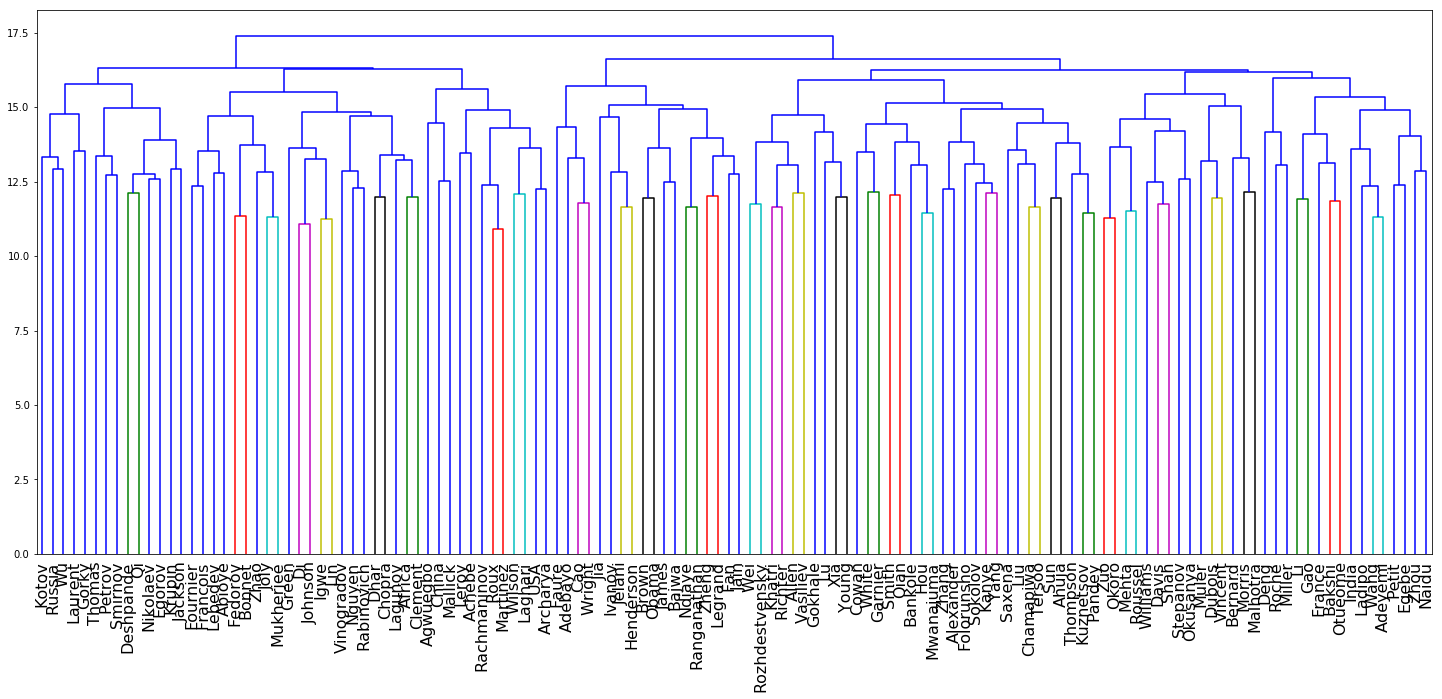

In [44]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
l = linkage(word2vec.wv.syn0,method='complete',metric='seuclidean')
plt.figure(figsize=(25,10))
dendrogram(
  l,
  leaf_rotation=90.,
  leaf_font_size=16,
  leaf_label_func=lambda v: str(word2vec.wv.index2word[v])
)
plt.show